In [ ]:
# Author: Brandon Botzer
# Date: 2/21/2024
# Class: Penn State - AI 879

In [2]:
# Imports for functions

# from PIL import Image

# import skimage as ski
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import patches
import cv2 as cv


# Showing the results of scipy computations
# import pandas as pd

cv.__version__#, ski.__version__

'4.5.5'

In [3]:
# I do not have a training file that I have made so I will use this one temporarily
trained_file = ski.data.lbp_frontal_face_cascade_filename()

In [4]:
# Create the Cascade detector object
cascade_detector = ski.feature.Cascade(trained_file)

In [5]:
# Load in the image with and without faces
pos_im = ski.io.imread('face_test.jpg')
neg_im = ski.io.imread('nature_image.jpg')

In [6]:
# I had to tinker with the min_size and the max_size of the search window for a bit to find the faces
#  Look into why this is the case
face_detected = cascade_detector.detect_multi_scale(img=pos_im,
                                                    scale_factor=1.2,
                                                    step_ratio=1,
                                                    min_size=(20,20),
                                                    max_size=(200, 200))

'''
face_detected is in the form of:

list of dicts
Dict have form
{‘r’: int,
‘c’: int,
‘width’: int,
‘height’: int},
where ‘r’ represents row position of top left corner of detected window,
‘c’ - col position,
‘width’ - width of detected window,
‘height’ - height of detected window.
'''

'\nface_detected is in the form of:\n\nlist of dicts\nDict have form\n{‘r’: int,\n‘c’: int,\n‘width’: int,\n‘height’: int},\nwhere ‘r’ represents row position of top left corner of detected window,\n‘c’ - col position,\n‘width’ - width of detected window,\n‘height’ - height of detected window.\n'

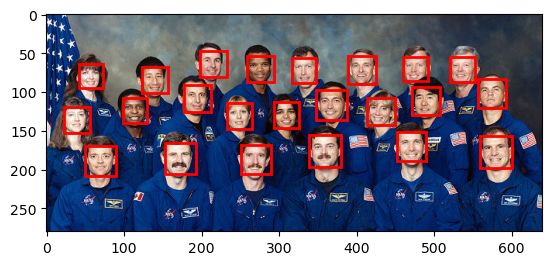

In [7]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# Show the positive image
plt.imshow(pos_im)

# Get the current axis
img_desc = plt.gca()
# Set the color mapping to gray
plt.set_cmap('gray')

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for patch in face_detected:

    # Add the patch to the image
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

# Show me everything
plt.show()

Trying again but with the XML file I build from MATLAB

In [5]:
# I do not have a training file that I have made so I will use this one temporarily
trained_file2 = 'FaceModel_LBP.xml'
# Create the Cascade detector object
cascade_detector2 = cv.CascadeClassifier(trained_file2)
# cascade_detector2 = ski.feature.Cascade(trained_file2)

In [20]:
pos_im_cv = cv.imread('face_test.jpg')

In [6]:
# I had to tinker with the min_size and the max_size of the search window for a bit to find the faces
#  Look into why this is the case
# face_detected2 = cascade_detector2.detectMultiScale


# OPENCV
face_detected2 = cascade_detector2.detectMultiScale(image=pos_im_cv,
                                                    minSize=(20,20),
                                                    maxSize=(200, 200))

# #SKIMAGE
# face_detected2 = cascade_detector2.detect_multi_scale(img=pos_im_cv,
#                                                     scale_factor=1.2,
#                                                     step_ratio=1,
#                                                     min_size=(20,20),
#                                                     max_size=(200, 200))

'''
face_detected is in the form of:

list of dicts
Dict have form
{‘r’: int,
‘c’: int,
‘width’: int,
‘height’: int},
where ‘r’ represents row position of top left corner of detected window,
‘c’ - col position,
‘width’ - width of detected window,
‘height’ - height of detected window.'''

NameError: name 'pos_im_cv' is not defined

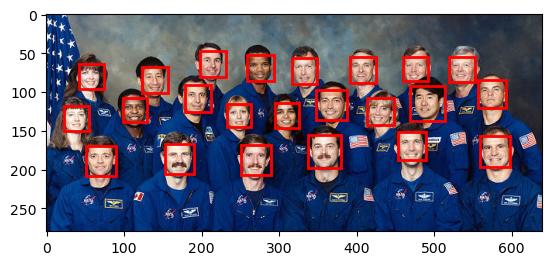

In [26]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# Show the positive image
plt.imshow(pos_im)

# Get the current axis
img_desc = plt.gca()
# Set the color mapping to gray
plt.set_cmap('gray')

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for patch in face_detected2:

    # Add the patch to the image
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

# Show me everything
plt.show()

In [33]:
import xml.etree.ElementTree as ET
import numpy as np

def parse_cascade_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    stages = []

    for stage in root.findall('.//stages/_'):
        stage_data = {'stage_threshold': float(stage.find('stageThreshold').text)}
        classifiers = []
        for classifier in stage.find('weakClassifiers'):
            classifier_data = {}
            internal_nodes = list(map(float, classifier.find('internalNodes').text.split()))
            classifier_data['internal_nodes'] = np.array(internal_nodes).reshape(-1, 4)
            leaf_values = list(map(float, classifier.find('leafValues').text.split()))
            classifier_data['leaf_values'] = np.array(leaf_values)
            classifiers.append(classifier_data)
        stage_data['classifiers'] = classifiers
        stages.append(stage_data)

    features = []
    for feature in root.findall('.//features/_'):
        feature_data = list(map(int, feature.find('rect').text.split()))
        features.append(feature_data)

    return stages, features

stages, features = parse_cascade_xml('FaceModel.xml')

print("Stages:")
for idx, stage in enumerate(stages):
    print("Stage", idx)
    print("Stage Threshold:", stage['stage_threshold'])
    print("Number of Weak Classifiers:", len(stage['classifiers']))
    print()

print("\nFeatures:")
for idx, feature in enumerate(features):
    print("Feature", idx, ":", feature)

Stages:
Stage 0
Stage Threshold: -0.18357695639133453
Number of Weak Classifiers: 4

Stage 1
Stage Threshold: -0.5135999917984009
Number of Weak Classifiers: 8

Stage 2
Stage Threshold: -0.3519616425037384
Number of Weak Classifiers: 6

Stage 3
Stage Threshold: -0.4071253836154938
Number of Weak Classifiers: 10

Stage 4
Stage Threshold: 0.10968577861785889
Number of Weak Classifiers: 7


Features:
Feature 0 : [0, 4, 8, 8, 4]
Feature 1 : [0, 4, 8, 8, 26]
Feature 2 : [4, 0, 8, 8, 16]
Feature 3 : [4, 0, 8, 8, 17]
Feature 4 : [4, 12, 8, 8, 35]
Feature 5 : [8, 0, 8, 8, 2]
Feature 6 : [8, 0, 8, 8, 17]
Feature 7 : [12, 0, 8, 8, 0]
Feature 8 : [12, 0, 8, 8, 11]
Feature 9 : [12, 0, 8, 8, 14]
Feature 10 : [12, 0, 8, 8, 15]
Feature 11 : [12, 12, 8, 8, 28]
Feature 12 : [12, 16, 8, 8, 26]
Feature 13 : [12, 16, 8, 8, 32]
Feature 14 : [12, 16, 8, 8, 33]
Feature 15 : [16, 0, 8, 8, 0]
Feature 16 : [16, 4, 8, 8, 13]
Feature 17 : [16, 8, 8, 8, 23]
Feature 18 : [16, 16, 8, 8, 9]
Feature 19 : [16, 16, 8, 8

In [34]:
import xml.etree.ElementTree as ET

def generate_skimage_xml(stages, features, output_file):
    root = ET.Element('opencv_storage')
    cascade = ET.SubElement(root, 'cascade')
    stageType = ET.SubElement(cascade, 'stageType')
    stageType.text = "BOOST"
    featureType = ET.SubElement(cascade, 'featureType')
    featureType.text = "HOG"

    for stage_idx, stage_data in enumerate(stages):
        stage = ET.SubElement(cascade, 'stage')
        stage_num = ET.SubElement(stage, 'stageNum')
        stage_num.text = str(stage_idx)
        stage_threshold = ET.SubElement(stage, 'stageThreshold')
        stage_threshold.text = str(stage_data['stage_threshold'])

        weakClassifiers = ET.SubElement(stage, 'weakClassifiers')
        for classifier_idx, classifier_data in enumerate(stage_data['classifiers']):
            weakClassifier = ET.SubElement(weakClassifiers, '_')
            internalNodes = ET.SubElement(weakClassifier, 'internalNodes')
            internalNodes.text = ' '.join(map(str, classifier_data['internal_nodes'].flatten()))
            leafValues = ET.SubElement(weakClassifier, 'leafValues')
            leafValues.text = ' '.join(map(str, classifier_data['leaf_values']))

    features_node = ET.SubElement(cascade, 'features')
    for feature_data in features:
        rect = ET.SubElement(features_node, '_')
        rect.text = ' '.join(map(str, feature_data))

    tree = ET.ElementTree(root)
    tree.write(output_file)

# Assuming you have already parsed the XML and obtained stages and features
# stages, features = parse_cascade_xml('your_xml_file.xml')

# Generate the XML file
generate_skimage_xml(stages, features, 'try_this_file.xml')

In [35]:
# I do not have a training file that I have made so I will use this one temporarily
trained_file3 = 'try_this_file.xml'
# Create the Cascade detector object
# cascade_detector2 = cv.CascadeClassifier(trained_file2)
cascade_detector3 = ski.feature.Cascade(trained_file3)

AttributeError: 'NoneType' object has no attribute 'text'